<a href="https://colab.research.google.com/github/HenrySomeCode/Separating-Object-From-Image/blob/main/Separate_object_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import numpy as np # pip install numpy 
import cv2 # pip install opencv-python
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
print(os.getcwd())

/content


In [22]:
from sklearn.cluster import *

In [23]:
folder_dir = r"/content/gdrive/MyDrive/AI_ML_DL Course_by_Master_Linh_HUST/week2/Me/data/image"
print("Cat image: {} images".format(len(os.listdir(folder_dir))))

Cat image: 18 images


(250, 249, 3)


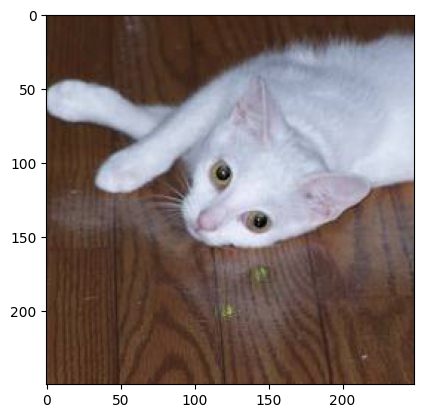

In [24]:
image = cv2.imread(os.path.join(folder_dir, "cat.322.jpg"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

In [25]:
image.shape

(250, 249, 3)

In [26]:
# create a list that contains values of pixels
image_px = []
# image.shape[0] : height (250), [1] : width, [3]: channels 
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        red, green, blue = image[i, j]
        image_px.append([red, green, blue])

In [ ]:
image_px

In [28]:
# Convert list to numpy array (float)
image_px = np.array(image_px).astype(np.float32)

In [29]:
image_px

array([[64., 43., 26.],
       [63., 42., 25.],
       [66., 45., 28.],
       ...,
       [89., 56., 37.],
       [97., 64., 45.],
       [89., 56., 37.]], dtype=float32)

In [32]:
# MinMaxScaler 
image_px = image_px/255.0

In [33]:
image_px

array([[0.2509804 , 0.16862746, 0.10196079],
       [0.24705882, 0.16470589, 0.09803922],
       [0.25882354, 0.1764706 , 0.10980392],
       ...,
       [0.34901962, 0.21960784, 0.14509805],
       [0.38039216, 0.2509804 , 0.1764706 ],
       [0.34901962, 0.21960784, 0.14509805]], dtype=float32)

In [ ]:
# Using K-means to split image into regions, setting n_clusters = 2 means I want to split the image into 2 regions: background and foreground  
n_clusters = 2
kmean = KMeans(n_clusters=n_clusters).fit(image_px)
# predicting on each pixel
clus = kmean.predict(image_px)
# create a matrix with the size as origin image but with the channel is equal to 1 
final_image = np.zeros((image.shape[0], image.shape[1], 1))

row = 0
col = 0

for pixel in clus:
    if col >= image.shape[1]:
        col = 0
        row += 1
    final_image[row][col] = pixel 
    col += 1
# if a pixel value is equal to 0 then replace it with 255, otherwise it's 0
final_image0 = np.where(final_image==0, 255, 0)
# if a pixel value is equal to 1 then replace it with 255, otherwise it's 0
final_image1 = np.where(final_image==1, 255, 0)
# conver final_image0 & 1  to unit8 numpy array to perform 'and' operator between image and final_image 0 & 1
final_image0 = np.uint8(final_image0)
final_image1 = np.uint8(final_image1)
# Perform 'and' operator between image and mask
# So 0 (10) is 00000000 (2) means balack, and 255 (10) is 11111111 (2) mean white.
# In 'and' operator, a pixel is black when it's multipled ('and') with 00000000 
# and it remains its value if it's multipled with 11111111. 
re0 = cv2.bitwise_and(image, image, mask=final_image0)
re1 = cv2.bitwise_and(image, image, mask=final_image1)

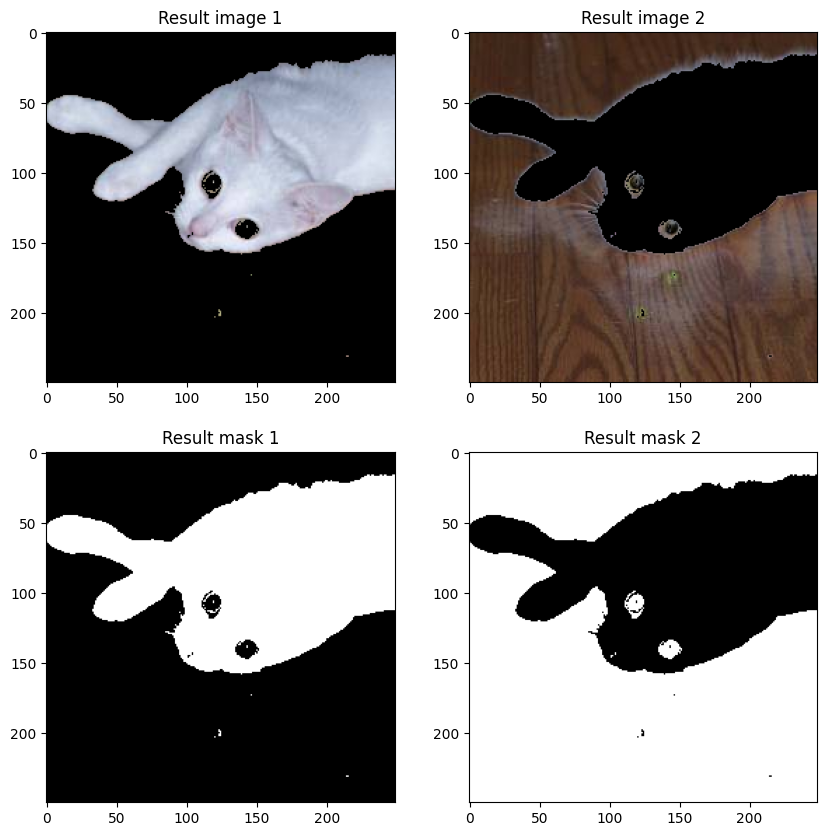

In [38]:
# Show results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10, 10))
ax1.imshow(re0)
ax1.set_title("Result image 1")
ax2.imshow(re1)
ax2.set_title("Result image 2")
ax3.imshow(final_image0.reshape((image.shape[0],image.shape[1])), cmap='gray')
ax3.set_title("Result mask 1")
ax4.imshow(final_image1.reshape((image.shape[0],image.shape[1])), cmap='gray')
ax4.set_title("Result mask 2")
plt.show()